In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import geopandas as gpd
from geopy import distance
import math

In [2]:
population = pd.read_csv('population.csv')
population = gpd.GeoDataFrame(population, geometry=gpd.points_from_xy(population.map_longitude, population.map_latitude))
population.population /= 1000
population['bubble_size'] = population.population / 5
population

,name,city,population,latitude,longitude,map_latitude,map_longitude,geometry,bubble_size
0,Вінницька,Вінниця,1507.738,49.2167,28.4333,49.06,28.6100,POINT (28.61000 49.06000),301.5476
1,Волинська,Луцьк,1020.770,50.7478,25.3244,50.69,25.5200,POINT (25.52000 50.69000),204.1540
2,Дніпропетровська,Дніпр,3093.151,48.4675,35.0400,48.32,35.2100,POINT (35.21000 48.32000),618.6302
3,Донецька,Донецьк,4056.405,48.0089,37.8042,47.76,37.8300,POINT (37.83000 47.76000),811.2810
4,Житомирська,Житомир,1177.564,50.2544,28.6578,50.07,28.8200,POINT (28.82000 50.07000),235.5128
5,Закарпатська,Ужгород,1243.721,48.6239,22.2950,48.48,22.6300,POINT (22.63000 48.48000),248.7442
6,Запорізька,Запоріжжя,1636.322,47.8378,35.1383,47.70,35.1200,POINT (35.12000 47.70000),327.2644
7,Івано-Франківська,Івано-Франківськ,1350.565,48.9228,24.7106,48.73,24.7900,POINT (24.79000 48.73000),270.1130
8,Київська,Київ,4746.244,50.4500,30.5236,50.28,30.5700,POINT (30.57000 50.28000),949.2488
9,Кіровоградська,Кропивницький,902.275,48.5103,32.2667,48.36,32.4100,POINT (32.41000 48.36000),180.4550


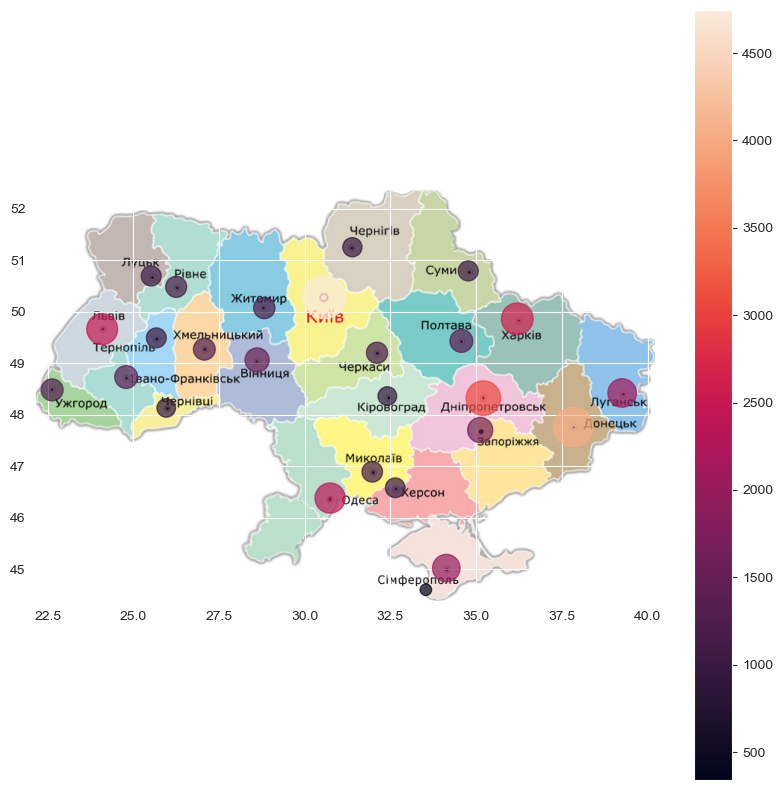

In [3]:
image = Image.open('Ukraine.jpg')
img_arr = np.array(image)
fig, axes = plt.subplots(figsize=(10, 10))

lon_min = 22.1371
lon_max = 40.2252
lat_min = 44.3820
lat_max = 52.3795

population.plot(ax=axes, column='population', markersize='bubble_size', alpha=0.7, categorical=False, legend=True)
axes.imshow(img_arr, extent=[lon_min, lon_max, lat_min, lat_max], aspect=image.width / image.height);

In [4]:
cities = []
km_distances = []
pixels_distances = []

pixels_per_lat = image.height / (lat_max - lat_min)
pixels_pet_lon = image.width / (lon_max - lon_min)

for _, city1 in population.iterrows():
    name1 = city1.city
    lat1 = city1.map_latitude
    lon1 = city1.map_longitude
    px_lat1 = pixels_per_lat * (lat1 - lat_min)
    px_lon1 = pixels_pet_lon * (lon1 - lon_min)
    for _, city2 in population.iterrows():
        name2 = city2.city
        lat2 = city2.map_latitude
        lon2 = city2.map_longitude
        px_lat2 = pixels_per_lat * (lat2 - lat_min)
        px_lon2 = pixels_pet_lon * (lon2 - lon_min)
        cities.append((name1, name2))
        km_distances.append(distance.distance((lat1, lon1), (lat2, lon2)).km)
        pixels_distances.append(math.sqrt((px_lat2 - px_lat1) ** 2 + (px_lon2 - px_lon1) ** 2))

distances = pd.DataFrame.from_dict({
    'origin': list(zip(*cities))[0],
    'destination': list(zip(*cities))[1],
    'km_distance': km_distances,
    'pixels_distances': pixels_distances
})

distances

,origin,destination,km_distance,pixels_distances
0,Вінниця,Вінниця,0.000000,0.000000
1,Вінниця,Луцьк,286.669844,181.262258
2,Вінниця,Дніпр,492.676679,307.503028
3,Вінниця,Донецьк,697.243431,433.016474
4,Вінниця,Житомир,113.355306,70.501321
...,...,...,...,...
671,Чернігів,Херсон,527.339127,327.981353
672,Чернігів,Хмельницький,378.584413,241.110377
673,Чернігів,Черкаси,233.741959,145.558848
674,Чернігів,Чернівці,523.133188,329.810441


In [5]:
distances.iloc[[distances.km_distance.idxmax()]]

,origin,destination,km_distance,pixels_distances
140,Ужгород,Луганськ,1227.780457,764.023516


In [6]:
distances.iloc[[distances.pixels_distances.idxmax()]]

,origin,destination,km_distance,pixels_distances
140,Ужгород,Луганськ,1227.780457,764.023516


In [7]:
ukr_regions = gpd.read_file('UKR_ADM1.shp')

In [8]:
ukr_gdp = pd.read_csv('ukr_GDP.csv', encoding='cp1251', skiprows=1, delimiter=';', index_col='Name')
ukr_gdp

,UKRname,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Name,,,,,,,,,,,,
Autonomous Republic of Crimea,Автономна Республіка Крим,NaN,NaN,NaN,NaN,NaN,NaN,44536,46393,NaN,NaN,NaN
Vinnytsia Oblast,Вінницька,NaN,NaN,NaN,NaN,NaN,NaN,33024,36191,43990.0,59871.0,74411.0
Volyn Oblast,Волинська,NaN,NaN,NaN,NaN,NaN,NaN,20005,20622,24195.0,31688.0,35744.0
Dnipropetrovsk Oblast,Дніпропетровська,NaN,NaN,NaN,NaN,NaN,NaN,147970,152905,176540.0,215206.0,244478.0
Donetsk Oblast,Донецька,NaN,NaN,NaN,NaN,NaN,NaN,170775,164926,119983.0,115012.0,137500.0
Zhytomyr Oblast,Житомирська,NaN,NaN,NaN,NaN,NaN,NaN,24849,25676,29815.0,38425.0,47919.0
Zakarpattia Oblast,Закарпатська,NaN,NaN,NaN,NaN,NaN,NaN,21404,21400,24120.0,28952.0,32390.0
Zaporizhia Oblast,Запорізька,NaN,NaN,NaN,NaN,NaN,NaN,54828,54352,65968.0,89061.0,104323.0
Ivano-Frankivsk Oblast,Івано-Франківська,NaN,NaN,NaN,NaN,NaN,NaN,32286,33196,37643.0,45854.0,51404.0


In [10]:
def fill_regression(row: pd.Series, dtype: type = None):
    row = row.iloc[1:]
    row.index = row.index.astype(int)
    notna_cols = row[row.notna()]
    na_cols = row[row.isna()]
    years = notna_cols.index - 2006
    values = notna_cols.values
    degree = 2
    model = np.poly1d(np.polyfit(years ** degree, values.astype(int), degree))
    for index, num in na_cols.items():
        row[index] = model(index - 2006)
    if dtype:
        row = row.astype(dtype)
    return row

In [11]:
ukr_gdp = ukr_gdp.apply(fill_regression, axis=1)
ukr_gdp

C:\ProgramData\anaconda3\lib\site-packages\pandas\core\apply.py:907: RankWarning: Polyfit may be poorly conditioned
  results[i] = self.f(v)
C:\ProgramData\anaconda3\lib\site-packages\pandas\core\apply.py:907: RankWarning: Polyfit may be poorly conditioned
  results[i] = self.f(v)


,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Name,,,,,,,,,,,
Autonomous Republic of Crimea,35283.003577,35621.589488,35955.514927,36284.779897,36609.384396,36929.328425,44536,46393,37861.197688,38162.499835,38459.141512
Vinnytsia Oblast,28516.130204,28418.794778,28332.866864,28258.346463,28195.233574,28143.528198,33024,36191,43990.000000,59871.000000,74411.000000
Volyn Oblast,15667.728951,15708.254676,15752.155515,15799.431468,15850.082534,15904.108715,20005,20622,24195.000000,31688.000000,35744.000000
Dnipropetrovsk Oblast,123314.284164,123538.077386,123782.406390,124047.271176,124332.671745,124638.608095,147970,152905,176540.000000,215206.000000,244478.000000
Donetsk Oblast,320222.339952,315159.780316,310161.966682,305228.899051,300360.577422,295557.001796,170775,164926,119983.000000,115012.000000,137500.000000
Zhytomyr Oblast,27183.992119,26948.923735,26722.874382,26505.844061,26297.832772,26098.840514,24849,25676,29815.000000,38425.000000,47919.000000
Zakarpattia Oblast,19905.346031,19875.814166,19849.486164,19826.362023,19806.441743,19789.725325,21404,21400,24120.000000,28952.000000,32390.000000
Zaporizhia Oblast,49916.847913,49708.576517,49515.929274,49338.906184,49177.507246,49031.732461,54828,54352,65968.000000,89061.000000,104323.000000
Ivano-Frankivsk Oblast,27575.305756,27610.655278,27650.237327,27694.051905,27742.099011,27794.378646,32286,33196,37643.000000,45854.000000,51404.000000


In [12]:
regions_gdp = pd.merge(ukr_regions, ukr_gdp, left_on='Name', right_index=True)
regions_gdp

,ISO_Code,Level,Name,adm,adm_int,feature_id,gbid,iso,geometry,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,UA-65,ADM1,Kherson Oblast,ADM1,1,0,UKR_ADM1_1_3_3_0,UKR,"POLYGON ((35.46760 46.14516, 35.46262 46.13371...",19260.406124,19138.246556,19022.609017,18913.493509,18810.900031,18714.828584,19357,20767,23250.000000,32215.000000,38743.000000
1,UA-07,ADM1,Volyn Oblast,ADM1,1,1,UKR_ADM1_1_3_3_1,UKR,"POLYGON ((26.10729 51.00529, 26.08816 51.00426...",15667.728951,15708.254676,15752.155515,15799.431468,15850.082534,15904.108715,20005,20622,24195.000000,31688.000000,35744.000000
2,UA-56,ADM1,Rivne Oblast,ADM1,1,2,UKR_ADM1_1_3_3_2,UKR,"POLYGON ((27.73464 51.59371, 27.73370 51.59002...",11860.903064,12082.303923,12304.943310,12528.821226,12753.937669,12980.292641,21795,22004,28724.000000,35252.000000,39469.000000
3,UA-18,ADM1,Zhytomyr Oblast,ADM1,1,3,UKR_ADM1_1_3_3_3,UKR,"POLYGON ((29.73521 49.94438, 29.72536 49.94179...",27183.992119,26948.923735,26722.874382,26505.844061,26297.832772,26098.840514,24849,25676,29815.000000,38425.000000,47919.000000
4,UA-32,ADM1,Kyiv Oblast,ADM1,1,4,UKR_ADM1_1_3_3_4,UKR,"MULTIPOLYGON (((30.34907 50.48887, 30.34805 50...",82066.839556,81193.191874,80346.916198,79528.012528,78736.480864,77972.321207,69663,68931,79561.000000,104030.000000,128638.000000
5,UA-74,ADM1,Chernihiv Oblast,ADM1,1,5,UKR_ADM1_1_3_3_5,UKR,"POLYGON ((33.50072 52.07412, 33.50067 52.06984...",23000.388244,22891.955833,22789.969955,22694.430610,22605.337797,22522.691518,23934,24237,28156.000000,36966.000000,43362.000000
6,UA-59,ADM1,Sumy Oblast,ADM1,1,6,UKR_ADM1_1_3_3_6,UKR,"POLYGON ((35.69266 50.34563, 35.68866 50.33474...",18038.377579,18138.891464,18243.283765,18351.554481,18463.703613,18579.731161,24933,26765,30397.000000,41567.000000,46287.000000
7,UA-63,ADM1,Kharkiv Oblast,ADM1,1,7,UKR_ADM1_1_3_3_7,UKR,"POLYGON ((38.09361 49.84606, 38.08983 49.84373...",92334.465986,91501.195088,90697.657379,89923.852859,89179.781528,88465.443386,82223,85315,96596.000000,124843.000000,154871.000000
8,UA-09,ADM1,Luhansk Oblast,ADM1,1,8,UKR_ADM1_1_3_3_8,UKR,"POLYGON ((40.22758 49.26053, 40.22442 49.25486...",132972.257249,130529.711445,128115.608183,125729.947465,123372.729290,121043.953658,58767,55108,31393.000000,23849.000000,31356.000000
9,UA-14,ADM1,Donetsk Oblast,ADM1,1,9,UKR_ADM1_1_3_3_9,UKR,"POLYGON ((39.09144 47.94099, 39.09062 47.93890...",320222.339952,315159.780316,310161.966682,305228.899051,300360.577422,295557.001796,170775,164926,119983.000000,115012.000000,137500.000000


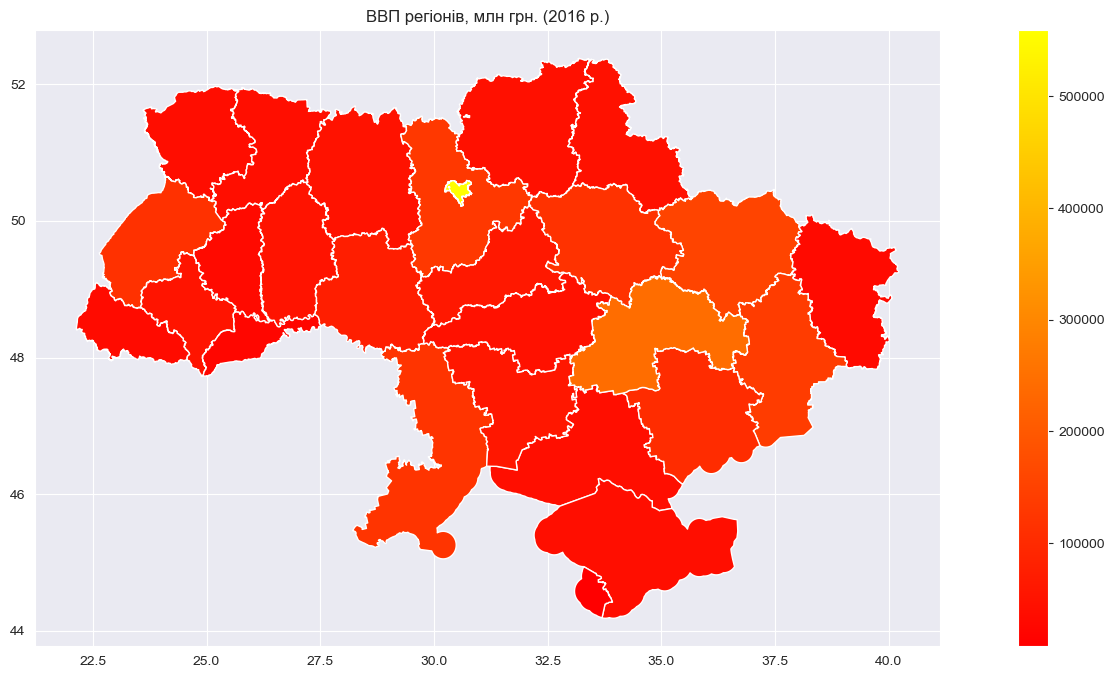

In [13]:
fig, axes = plt.subplots(figsize=(20, 8))
axes.set_title('ВВП регіонів, млн грн. (2016 p.)')
regions_gdp.plot(ax=axes, column=2016, legend=True, cmap='autumn');

In [14]:
ukr_zp = pd.read_csv('ukr_ZP.csv', encoding='cp1251', delimiter=';', skiprows=1, index_col='Name')
ukr_zp.drop(columns=['Unnamed: 13'], inplace=True)
ukr_zp

,UKRname,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Name,,,,,,,,,,,,
Autonomous Republic of Crimea,Автономна Республіка Крим,7200,9435,12095,12033,14890,17274,19822,21010,NaN,NaN,NaN
Vinnytsia Oblast,Вінницька,5381,7071,9191,9002,10977,12865,14685,15135,16045.0,19989.0,25692.0
Volyn Oblast,Волинська,3010,3973,5104,5070,6198,7254,8197,8607,9013.0,11456.0,14970.0
Dnipropetrovsk Oblast,Дніпропетровська,18927,26077,33930,33473,41445,48808,57168,57783,62314.0,73670.0,90735.0
Donetsk Oblast,Донецька,25167,33809,44110,43330,53159,61728,72823,74002,61069.0,49263.0,61195.0
Zhytomyr Oblast,Житомирська,4315,5865,7561,7378,8972,10505,11681,11935,12582.0,15659.0,20200.0
Zakarpattia Oblast,Закарпатська,3392,4452,5716,5642,6861,7893,8942,9192,9704.0,12515.0,16403.0
Zaporizhia Oblast,Запорізька,9336,12559,16345,16027,19583,23042,25922,25941,27727.0,33160.0,40415.0
Ivano-Frankivsk Oblast,Івано-Франківська,3904,5267,6818,6580,7992,9214,10628,10873,11344.0,14240.0,18409.0


In [15]:
ukr_zp = ukr_zp.apply(fill_regression, axis=1, dtype=float)
ukr_zp

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Name,,,,,,,,,,,
Autonomous Republic of Crimea,7200.0,9435.0,12095.0,12033.0,14890.0,17274.0,19822.0,21010.0,12064.447156,12457.561574,12841.878448
Vinnytsia Oblast,5381.0,7071.0,9191.0,9002.0,10977.0,12865.0,14685.0,15135.0,16045.000000,19989.000000,25692.000000
Volyn Oblast,3010.0,3973.0,5104.0,5070.0,6198.0,7254.0,8197.0,8607.0,9013.000000,11456.000000,14970.000000
Dnipropetrovsk Oblast,18927.0,26077.0,33930.0,33473.0,41445.0,48808.0,57168.0,57783.0,62314.000000,73670.000000,90735.000000
Donetsk Oblast,25167.0,33809.0,44110.0,43330.0,53159.0,61728.0,72823.0,74002.0,61069.000000,49263.000000,61195.000000
Zhytomyr Oblast,4315.0,5865.0,7561.0,7378.0,8972.0,10505.0,11681.0,11935.0,12582.000000,15659.000000,20200.000000
Zakarpattia Oblast,3392.0,4452.0,5716.0,5642.0,6861.0,7893.0,8942.0,9192.0,9704.000000,12515.000000,16403.000000
Zaporizhia Oblast,9336.0,12559.0,16345.0,16027.0,19583.0,23042.0,25922.0,25941.0,27727.000000,33160.000000,40415.000000
Ivano-Frankivsk Oblast,3904.0,5267.0,6818.0,6580.0,7992.0,9214.0,10628.0,10873.0,11344.000000,14240.000000,18409.000000


In [16]:
regions_zp = pd.merge(ukr_regions, ukr_zp, left_on='Name', right_index=True)
regions_zp

,ISO_Code,Level,Name,adm,adm_int,feature_id,gbid,iso,geometry,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,UA-65,ADM1,Kherson Oblast,ADM1,1,0,UKR_ADM1_1_3_3_0,UKR,"POLYGON ((35.46760 46.14516, 35.46262 46.13371...",3397.0,4457.0,5697.0,5593.0,6766.0,7947.0,8956.0,9061.0,9471.000000,12021.000000,15329.000000
1,UA-07,ADM1,Volyn Oblast,ADM1,1,1,UKR_ADM1_1_3_3_1,UKR,"POLYGON ((26.10729 51.00529, 26.08816 51.00426...",3010.0,3973.0,5104.0,5070.0,6198.0,7254.0,8197.0,8607.0,9013.000000,11456.000000,14970.000000
2,UA-56,ADM1,Rivne Oblast,ADM1,1,2,UKR_ADM1_1_3_3_2,UKR,"POLYGON ((27.73464 51.59371, 27.73370 51.59002...",3680.0,4830.0,6317.0,6154.0,7519.0,8862.0,10182.0,10692.0,11314.000000,14013.000000,17841.000000
3,UA-18,ADM1,Zhytomyr Oblast,ADM1,1,3,UKR_ADM1_1_3_3_3,UKR,"POLYGON ((29.73521 49.94438, 29.72536 49.94179...",4315.0,5865.0,7561.0,7378.0,8972.0,10505.0,11681.0,11935.0,12582.000000,15659.000000,20200.000000
4,UA-32,ADM1,Kyiv Oblast,ADM1,1,4,UKR_ADM1_1_3_3_4,UKR,"MULTIPOLYGON (((30.34907 50.48887, 30.34805 50...",7776.0,10586.0,14009.0,13884.0,17127.0,20668.0,24019.0,25054.0,26720.000000,31923.000000,41994.000000
5,UA-74,ADM1,Chernihiv Oblast,ADM1,1,5,UKR_ADM1_1_3_3_5,UKR,"POLYGON ((33.50072 52.07412, 33.50067 52.06984...",4065.0,5426.0,6989.0,6853.0,8355.0,9822.0,10957.0,11004.0,11468.000000,14017.000000,17721.000000
6,UA-59,ADM1,Sumy Oblast,ADM1,1,6,UKR_ADM1_1_3_3_6,UKR,"POLYGON ((35.69266 50.34563, 35.68866 50.33474...",4707.0,6266.0,8040.0,7711.0,9297.0,10613.0,11993.0,12284.0,12912.000000,16029.000000,20403.000000
7,UA-63,ADM1,Kharkiv Oblast,ADM1,1,7,UKR_ADM1_1_3_3_7,UKR,"POLYGON ((38.09361 49.84606, 38.08983 49.84373...",11874.0,16232.0,21493.0,21462.0,26066.0,30636.0,34606.0,35883.0,37690.000000,44709.000000,56206.000000
8,UA-09,ADM1,Luhansk Oblast,ADM1,1,8,UKR_ADM1_1_3_3_8,UKR,"POLYGON ((40.22758 49.26053, 40.22442 49.25486...",9912.0,13429.0,17351.0,17116.0,21257.0,25222.0,29327.0,29941.0,23388.000000,16039.000000,20930.000000
9,UA-14,ADM1,Donetsk Oblast,ADM1,1,9,UKR_ADM1_1_3_3_9,UKR,"POLYGON ((39.09144 47.94099, 39.09062 47.93890...",25167.0,33809.0,44110.0,43330.0,53159.0,61728.0,72823.0,74002.0,61069.000000,49263.000000,61195.000000


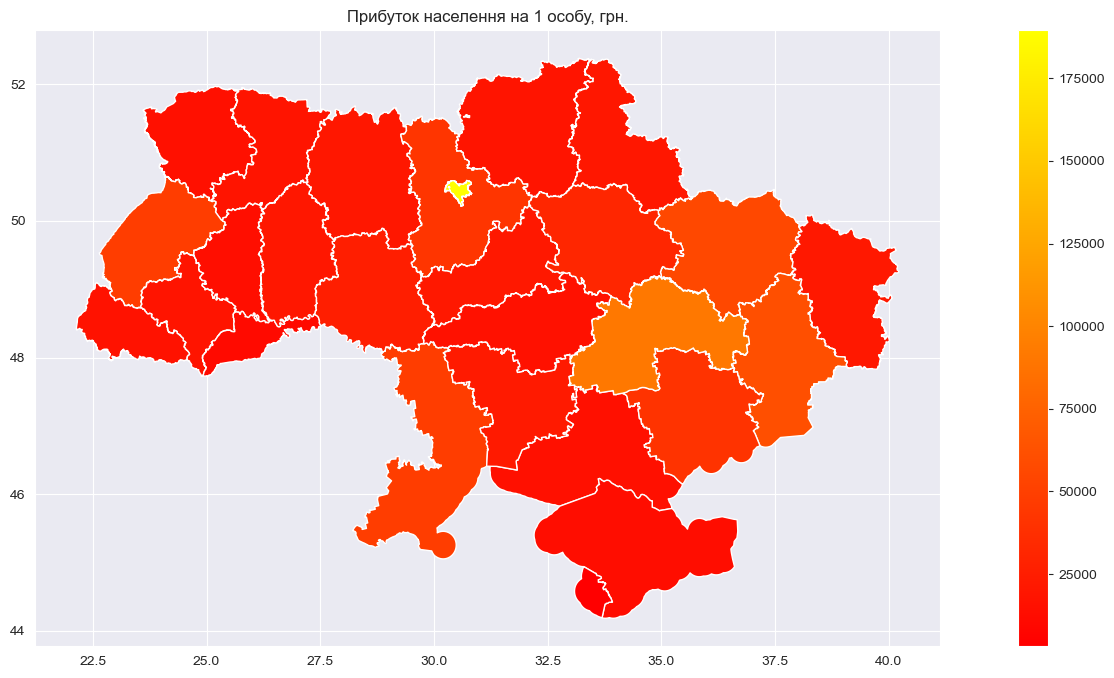

In [17]:
fig, axes = plt.subplots(figsize=(20, 8))
axes.set_title('Прибуток населення на 1 особу, грн.')
regions_zp.plot(ax=axes, column=2016, legend=True, cmap='autumn');

In [22]:
regions_corr = pd.merge(ukr_regions, ukr_gdp.loc[:, 2006:2015].corrwith(ukr_zp.loc[:, 2006:2015], axis=1).rename('corr'), left_on='Name', right_index=True)
regions_corr[['Name', 'corr']]

,Name,corr
0,Kherson Oblast,0.737066
1,Volyn Oblast,0.874269
2,Rivne Oblast,0.907547
3,Zhytomyr Oblast,0.573420
4,Kyiv Oblast,0.231669
5,Chernihiv Oblast,0.717228
6,Sumy Oblast,0.874513
7,Kharkiv Oblast,0.447050
8,Luhansk Oblast,-0.474983
9,Donetsk Oblast,-0.628179


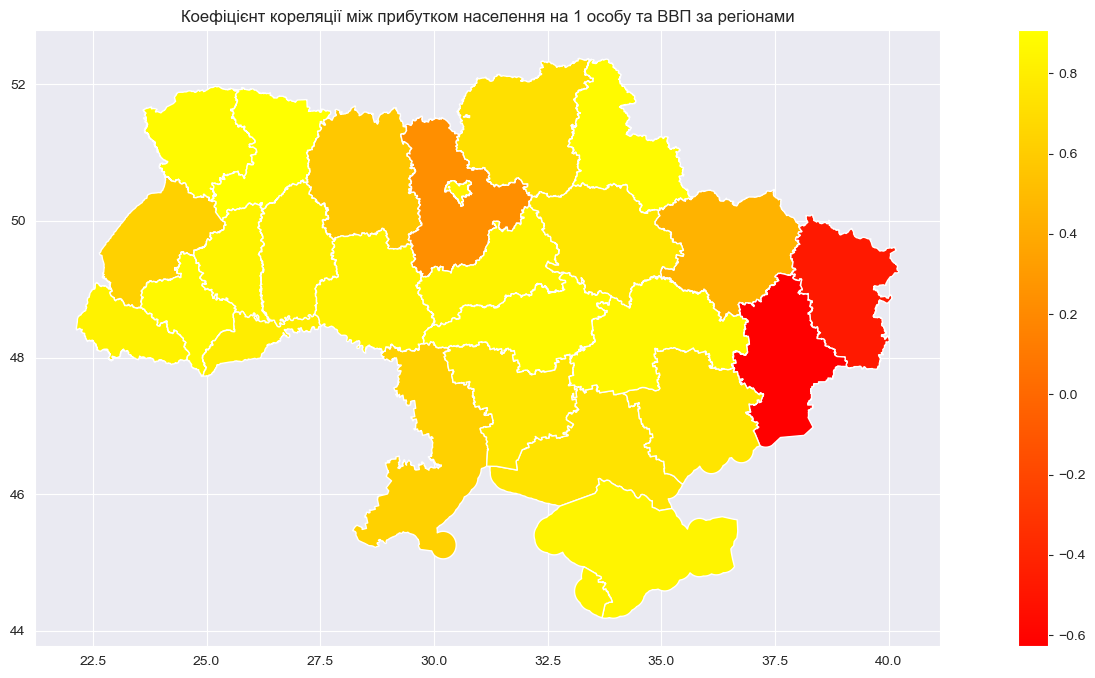

In [23]:
fig, axes = plt.subplots(figsize=(20, 8))
axes.set_title('Коефіцієнт кореляції між прибутком населення на 1 особу та ВВП за регіонами')
regions_corr.plot(ax=axes, column='corr', legend=True, cmap='autumn');